In [1]:
# import warnings; warnings.simplefilter('ignore')

import hotspot
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse as sparse

from sklearn.decomposition import PCA
from umap import UMAP
from scipy.io import mmread
from scipy.sparse import csr_matrix
from scipy.sparse import coo_matrix

import scanpy
from anndata import AnnData

### Read in CRISPR dataset

Export the Seurat object as a loom file then read in via Scanpy to obtain AnnData object OR load using csv file of genes x cellbc matrix. Obtain UMI_counts from Seurat object 

In [2]:
# adata = scanpy.read_h5ad("/datastore_share/Users/mayho/crispr/gRNA_guide.h5ad")
# counts = adata.X.transpose()
counts = pd.read_csv("/datastore_share/Users/mayho/crispr/datasets/neurons_GE.csv")
genes = pd.read_table("/datastore_share/Users/mayho/crispr/datasets/neurons_GE_genes.tsv", header=None)[1:]
pca_data = pd.read_csv("/datastore_share/Users/mayho/crispr/datasets/neurons_GE_harmony.csv")
umi_counts = pd.read_csv("/datastore_share/Users/mayho/crispr/datasets/neurons_GE_counts.csv")

In [3]:
counts = counts.set_index("Unnamed: 0")
counts.head()

,ED190203_GGCTTTCTCAAGATAG,ED190203_TAGTGCATCAAACCCA,ED190203_ATGATCGCACAACATC,ED190203_TTCTGTAGTTGGGTTT,ED190203_TCAAGCACAATCTCTT,ED190203_GGGACCTGTTTGGAAA,ED190203_AGCCACGTCTCGACGG,ED190203_TTTATGCAGTGGCCTC,ED190203_TTGTTTGTCAATCTCT,ED190203_TGGAGAGAGCCTGAGA,...,ED201020_TATCTTGGTTGGGAAC,ED201020_AGGGTTTCAACTCGTA,ED201020_ACATTTCAGTGGTTGG,ED201020_CCCTCAACAGGACTTT,ED201020_CGGAACCTCTGGTTGA,ED201020_GCATCGGGTATCGCGC,ED201020_AGGGAGTCAAGCCATT,ED201020_ATCACGAGTGGCAACA,ED201020_TCCACCATCCGGCTTT,ED201020_TCGGGACGTATCGAGG
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Xkr4,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,1
Gm1992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gm37381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rp1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rp1.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
pca_data = pca_data.set_index("Unnamed: 0")
pca_data.head()

,harmony_1,harmony_2,harmony_3,harmony_4,harmony_5,harmony_6,harmony_7,harmony_8,harmony_9,harmony_10,...,harmony_21,harmony_22,harmony_23,harmony_24,harmony_25,harmony_26,harmony_27,harmony_28,harmony_29,harmony_30
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
ED190203_GGCTTTCTCAAGATAG,-23.106982,20.331513,9.213757,-8.135876,-4.531794,-12.055691,9.417072,-2.852252,3.818419,0.840822,...,-2.617743,6.567167,-4.025478,-1.203441,2.960168,0.325432,-1.838675,-1.172363,3.152239,-3.853711
ED190203_TAGTGCATCAAACCCA,-21.736961,2.944698,9.341555,-23.458954,-1.941589,5.535587,-0.418744,-0.407916,-1.353759,-0.705798,...,-2.568914,-1.715534,-1.058858,1.580760,-0.539874,1.784546,-0.475298,-0.198644,0.567425,0.310095
ED190203_ATGATCGCACAACATC,-3.721808,-8.473028,-13.020901,-5.854364,1.248542,-5.492867,-9.432348,0.680718,-1.463882,-10.517416,...,-2.610359,-8.926004,-1.666079,5.045425,6.379704,2.285407,6.896913,-3.583494,4.739397,5.579462
ED190203_TTCTGTAGTTGGGTTT,-19.758071,12.362704,3.259111,-7.681331,-3.529423,10.316113,1.507118,-0.757485,-0.885485,0.956963,...,0.628409,-5.499152,-13.770467,-1.529563,-7.865679,-8.633948,5.042181,6.019856,-1.504700,4.890032
ED190203_TCAAGCACAATCTCTT,-25.833135,1.586760,14.265620,-29.856084,-3.650319,5.872278,0.969689,0.945782,-0.213368,1.722306,...,-2.705573,-1.479936,-3.096739,1.927557,-0.182476,-0.602087,-1.684860,-0.783606,-1.982602,-1.194156


In [5]:
pca_data.shape

(4238, 30)

In [6]:
genes = genes.set_index(0)
umi_counts= umi_counts.set_index("Unnamed: 0")
umi_counts = umi_counts.nCount_RNA
umi_counts 

Unnamed: 0
ED190203_GGCTTTCTCAAGATAG     5877
ED190203_TAGTGCATCAAACCCA     7603
ED190203_ATGATCGCACAACATC     7102
ED190203_TTCTGTAGTTGGGTTT     5258
ED190203_TCAAGCACAATCTCTT     7264
                             ...  
ED201020_GCATCGGGTATCGCGC    18363
ED201020_AGGGAGTCAAGCCATT     5333
ED201020_ATCACGAGTGGCAACA    17197
ED201020_TCCACCATCCGGCTTT    18419
ED201020_TCGGGACGTATCGAGG    21735
Name: nCount_RNA, Length: 4238, dtype: int64

In [171]:
# counts = pd.DataFrame(counts.astype('int64').todense(), columns=adata.obs.index, index=genes.index)

AttributeError: 'DataFrame' object has no attribute 'todense'

In [7]:
# Create the Hotspot object and the neighborhood graph

hs = hotspot.Hotspot(counts,model='danb', latent=pca_data, umi_counts=umi_counts)

hs.create_knn_graph(
    weighted_graph=False, n_neighbors=30,
)


Removing 9154 undetected/non-varying genes


### Determining Informative Genes

In [8]:
hs_results = hs.compute_autocorrelations()


100%|██████████| 19538/19538 [00:06<00:00, 2859.26it/s]


In [9]:
hs_results.head(15)

,C,Z,Pval,FDR
Gene,,,,
Gm26735,0.393352,408.160599,0.0,0.0
Btg1,0.584208,359.134649,0.0,0.0
Pfn2,0.630926,352.169983,0.0,0.0
Foxp2,0.698480,313.750556,0.0,0.0
Dlx6os1,0.617594,299.780017,0.0,0.0
Stmn1,0.680640,298.081042,0.0,0.0
Hist1h1b,0.637172,291.444260,0.0,0.0
Stmn2,0.698472,280.836764,0.0,0.0
Tmsb10,0.639235,277.964036,0.0,0.0


In [10]:
# Select the genes with significant lineage autocorrelation
hs_genes = hs_results.loc[hs_results.FDR < 0.05].sort_values('Z', ascending=False).head(500).index

# Compute pair-wise local correlations between these genes
lcz = hs.compute_local_correlations(hs_genes, jobs=4)

100%|██████████| 500/500 [00:00<00:00, 3412.98it/s]

Computing pair-wise local correlation on 500 features...



100%|██████████| 124750/124750 [00:18<00:00, 6832.54it/s]


In [29]:
# create modules

modules = hs.create_modules(
    min_gene_threshold=30, core_only=True, fdr_threshold=0.05
)

modules.value_counts()

 6    70
 1    69
 4    58
 5    54
 2    54
 3    52
 7    49
 8    47
-1    47
Name: Module, dtype: int64

### Plotting module relations

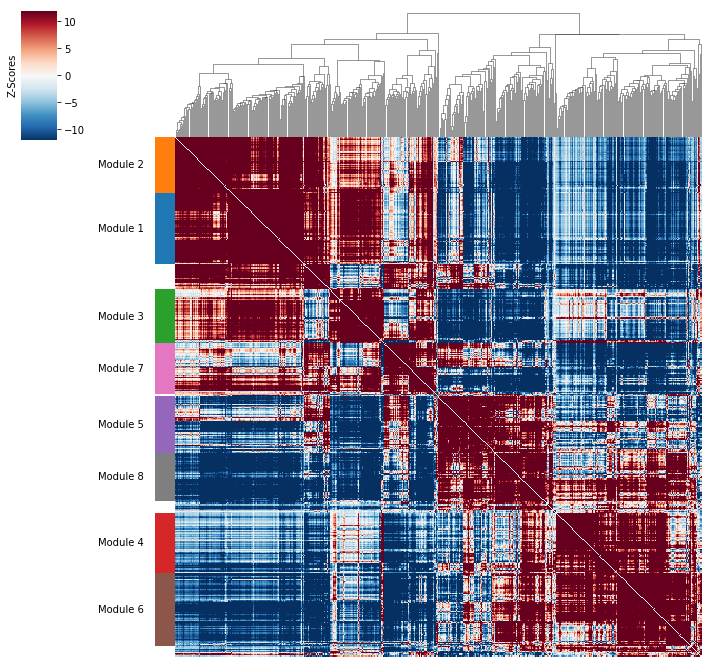

In [30]:
hs.plot_local_correlations(vmin=-12, vmax=12)

In [33]:
# Show the top genes for a module
def show_genes(x):
    module = x

    results = hs.results.join(hs.modules)
    results = results.loc[results.Module == module]

    return genes.join(results).sort_values('Z', ascending=False).head(50)

modules = pd.DataFrame()
module_num = range(1,9,1)
for m in map(show_genes, module_num):
    modules = modules.append(m, ignore_index = False)
# print(modules.head())

In [14]:
# write out module 
modules.to_csv("/datastore_share/Users/mayho/crispr/results/hotspot/neuron_GE_module_141021.csv")

In [47]:
modules
modules.loc[modules['Module'] == 5.0]

,C,Z,Pval,FDR,Module
0,,,,,
Gm26735,0.393352,408.160599,0.0,0.0,5.0
Btg1,0.584208,359.134649,0.0,0.0,5.0
Pfn2,0.630926,352.169983,0.0,0.0,5.0
Dlx6os1,0.617594,299.780017,0.0,0.0,5.0
Stmn1,0.680640,298.081042,0.0,0.0,5.0
Stmn2,0.698472,280.836764,0.0,0.0,5.0
Tmsb10,0.639235,277.964036,0.0,0.0,5.0
Sox4,0.617306,277.567574,0.0,0.0,5.0
H3f3a,0.648183,276.459156,0.0,0.0,5.0


### Summary Module Scores

In [41]:
module_scores = hs.calculate_module_scores()

module_scores.head()

  0%|          | 0/8 [00:00<?, ?it/s]

Computing scores for 8 modules...


100%|██████████| 8/8 [00:01<00:00,  6.42it/s]


,1,2,3,4,5,6,7,8
ED190203_GGCTTTCTCAAGATAG,-2.738656,-2.134775,-2.218178,-1.190703,-0.937812,4.050131,-1.637926,4.367762
ED190203_TAGTGCATCAAACCCA,-2.528313,-2.030015,-2.024565,-1.483197,6.113844,-2.730896,1.277705,0.266127
ED190203_ATGATCGCACAACATC,-2.992822,-1.980769,3.962322,-1.889843,-4.817689,-4.402096,8.260722,-4.920248
ED190203_TTCTGTAGTTGGGTTT,-2.366658,-1.918055,-0.712331,1.208562,0.748951,0.891163,-1.709026,-0.436184
ED190203_TCAAGCACAATCTCTT,-2.603236,-1.778391,-2.315161,-1.742942,9.705129,-3.166606,0.984349,1.339174


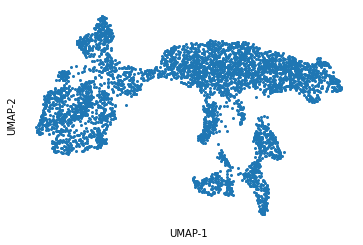

In [42]:
umap_data = UMAP(n_neighbors=30, min_dist=.5).fit_transform(pca_data)
umap_data = pd.DataFrame(umap_data, index=counts.columns, columns=['UMAP1', 'UMAP2'])

plt.figure()
plt.plot(umap_data.UMAP1, umap_data.UMAP2, 'o', ms=2)
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
for sp in plt.gca().spines.values():
    sp.set_visible(False)
plt.xticks([])
plt.yticks([]);

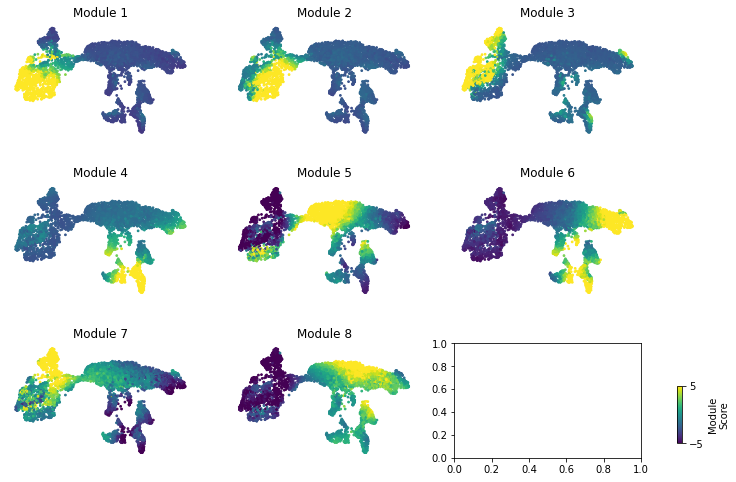

In [44]:
fig, axs = plt.subplots(3, 3, figsize=(10, 8))
cax = fig.add_axes(
    [.95, .15, .007, .1]
)

for ax, mod in zip(axs.ravel(), hs.module_scores.columns):
    sc = hs.module_scores[mod]
    # vmin = np.percentile(sc, 5)
    # vmax = np.percentile(sc, 95)
    vmin = -5
    vmax = 5
    plt.sca(ax)
    sc = plt.scatter(
        umap_data.UMAP1, umap_data.UMAP2,
        s=3, c=sc, vmin=vmin, vmax=vmax,
        rasterized=True)
    plt.xticks([])
    plt.yticks([])
    plt.title("Module {}".format(mod))
    for sp in ax.spines.values():
        sp.set_visible(False)

plt.subplots_adjust(hspace=0.4)
plt.colorbar(sc, cax=cax, ticks=[vmin, vmax], label='Module\nScore')
plt.subplots_adjust(left=0.02, right=0.9)
# plt.savefig("/data/mayerlab/mayho/crispr_analysis/figures/neuron_GE_module.png")

In [49]:
module_scores.to_csv("/datastore_share/Users/mayho/crispr/results/hotspot/module_score_neuron_GE_141021.csv")